In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Complete Dataset/preprocessedWithGPS.csv')

df.head(5)

,player_names,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,stress,injury_ts,...,acwr,atl,ctl28,ctl42,monotony,strain,team_performance,offensive_performance,defensive_performance,illness
0,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,720.0,3.0,4.0,7.0,8.0,3.0,3.0,3.0,0.0,...,3.999682,125.71,31.43,20.95,0.41,360.8,4.280000,4.26,4.70,0
1,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,800.0,3.0,3.0,6.0,8.0,3.0,3.0,3.0,0.0,...,4.000259,154.29,38.57,25.71,0.41,442.8,6.660000,6.13,7.13,0
2,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,900.0,2.0,4.0,6.0,7.0,3.0,3.0,4.0,0.0,...,4.000523,152.86,38.21,25.48,0.41,438.7,7.360000,6.75,7.07,0
3,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,200.0,3.0,3.0,6.0,7.0,3.0,3.0,3.0,0.0,...,3.999752,161.43,40.36,26.90,0.41,463.3,6.275556,5.85,5.90,0
4,TeamA-2d44f941-2f24-4fc2-afa8-611a091f2e93,720.0,3.0,3.0,6.0,7.0,2.0,3.0,3.0,0.0,...,4.000187,214.29,53.57,35.71,0.41,615.0,6.490000,4.14,5.99,0


In [ ]:
# Get the count of rows and columns
num_rows, num_columns = df.shape

# Print the count of rows and columns
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

# Print all column names
print("Column Names:")
print(df.columns)

# Check if any row contains NaN value in every column
nan_rows = df[df.isna().all(axis=1)]

if len(nan_rows) > 0:
    print("\nRows with NaN values in every column:")
    print(nan_rows)
else:
    print("\nNo rows with NaN values in every column.")

Number of rows: 8595
Number of columns: 28
Column Names:
Index(['player_names', 'daily_load', 'fatigue', 'mood', 'readiness',
       'sleep_duration', 'sleep_quality', 'soreness', 'stress', 'injury_ts',
       'weekly_load', 'Team', 'Total_distance', 'Average_running_speed',
       'Top_speed', 'HIR', 'Date', 'injury', 'acwr', 'atl', 'ctl28', 'ctl42',
       'monotony', 'strain', 'team_performance', 'offensive_performance',
       'defensive_performance', 'illness'],
      dtype='object')

No rows with NaN values in every column.


In [ ]:
df.rename(columns={}, inplace=True)

In [ ]:
df['injury'].value_counts()

injury
0    8539
1      56
Name: count, dtype: int64

## Feature engineering

#### Outlier Removing

In [ ]:
# import pandas as pd
# import numpy as np

# # Function to remove outliers using IQR
# def remove_outliers_iqr(df, columns):
#     Q1 = df[columns].quantile(0.25)
#     Q3 = df[columns].quantile(0.75)
#     IQR = Q3 - Q1
#     return df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# # Columns with outliers based on outliers report
# outlier_columns = ['atl', 'ctl28', 'ctl42', 'daily_load', 'strain', 'weekly_load']

# df = remove_outliers_iqr(df, outlier_columns)

In [ ]:
df['injury'].value_counts()

injury
0    8539
1      56
Name: count, dtype: int64

#### Introducing New Features

In [ ]:
# Historical Injury Data
df['historical_injury_count'] = df.groupby('player_names')['injury'].cumsum()

# Modification for Team Column
df['Team'] = df['Team'].replace({'TeamA': 0, 'TeamB': 1})

# df.drop(columns=['player_names'], inplace=True)
# # Extracting Time Components (Week)
# df['week'] = pd.to_datetime(df.iloc[:, 0]).dt.week

In [ ]:
# Load and Readiness Interaction
df['load_readiness_interaction'] = df['daily_load'] * df['readiness']

# Sleep and Readiness Interaction
df['sleep_readiness_interaction'] = df['sleep_duration'] * df['sleep_quality']

# Load and Fatigue Interaction
df['load_fatigue_interaction'] = df['daily_load'] * df['fatigue']

# Strain and Readiness Interaction
df['strain_readiness_interaction'] = df['strain'] * df['readiness']

# Stress and Readiness Interaction
df['stress_readiness_interaction'] = df['stress'] * df['readiness']

# Performance and Readiness Interaction
df['team_performance_readiness_interaction'] = df['team_performance'] * df['readiness']
df['offensive_performance_readiness_interaction'] = df['offensive_performance'] * df['readiness']
df['defensive_performance_readiness_interaction'] = df['defensive_performance'] * df['readiness']

# Defensive Performance and Weekly Interaction
df['defensive_performance_weekly_interaction'] = df['defensive_performance'] * df['weekly_load']

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to numerical features
numerical_features = ['acwr', 'weekly_load', 'stress']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

#### Aggregated Metrics

In [ ]:
# Calculate rolling averages for 'acwr' over a specific time window
window_size = 7  # Define the rolling window size (e.g., 7 days)
df['acwr_rolling_avg'] = df['acwr'].rolling(window=window_size).mean()

# Calculate exponential moving average for 'weekly_load' with a decay factor
decay_factor = 0.5  # Define the decay factor (e.g., 0.5)
df['weekly_load_ema'] = df['weekly_load'].ewm(alpha=1-decay_factor).mean()

# Calculate rolling sum for 'stress' over a specific time window
window_size = 14  # Define the rolling window size (e.g., 14 days)
df['stress_rolling_sum'] = df['stress'].rolling(window=window_size).sum()

##### Null Value Handling

In [ ]:
# Count NaN values in each column
nan_counts = df.isna().sum()

# Print count of NaN values in each column
print("Count of NaN values in each column:")
print(nan_counts)

Count of NaN values in each column:
player_names                                    0
daily_load                                      0
fatigue                                         0
mood                                            0
readiness                                       0
sleep_duration                                  0
sleep_quality                                   0
soreness                                        0
stress                                          0
injury_ts                                       0
weekly_load                                     0
Team                                            0
Total_distance                                  0
Average_running_speed                           0
Top_speed                                       0
HIR                                             0
Date                                            0
injury                                          0
acwr                                            0
atl           

In [ ]:
# Check for null values in 'stress_rolling_sum' or 'acwr_rolling_avg'
null_rows = df[df['stress_rolling_sum'].isnull() | df['acwr_rolling_avg'].isnull()]

# Print the 'injury' column for rows with null values in 'stress_rolling_sum' or 'acwr_rolling_avg'
for index, row in null_rows.iterrows():
    print(f"Row index: {index}, 'injury' value: {row['injury']}")

Row index: 0, 'injury' value: 0
Row index: 1, 'injury' value: 0
Row index: 2, 'injury' value: 0
Row index: 3, 'injury' value: 0
Row index: 4, 'injury' value: 0
Row index: 5, 'injury' value: 0
Row index: 6, 'injury' value: 0
Row index: 7, 'injury' value: 0
Row index: 8, 'injury' value: 0
Row index: 9, 'injury' value: 0
Row index: 10, 'injury' value: 0
Row index: 11, 'injury' value: 0
Row index: 12, 'injury' value: 0


In [ ]:
# Drop rows where either 'stress_rolling_sum' or 'acwr_rolling_avg' contains null value
df = df.dropna(subset=['stress_rolling_sum', 'acwr_rolling_avg'])

# Print the updated dataframe shape
print("Updated DataFrame shape:", df.shape)

Updated DataFrame shape: (8582, 41)


In [ ]:

df.reset_index(drop=True, inplace=True)


In [ ]:
df['Date'][0]

'14.06.2020'

In [ ]:
df.to_csv("rawInjury.csv")

#### Data Augmentation

In [ ]:
print(df.columns)

Index(['player_names', 'daily_load', 'fatigue', 'mood', 'readiness',
       'sleep_duration', 'sleep_quality', 'soreness', 'stress', 'injury_ts',
       'weekly_load', 'Team', 'Total_distance', 'Average_running_speed',
       'Top_speed', 'HIR', 'Date', 'injury', 'acwr', 'atl', 'ctl28', 'ctl42',
       'monotony', 'strain', 'team_performance', 'offensive_performance',
       'defensive_performance', 'illness', 'historical_injury_count',
       'load_readiness_interaction', 'sleep_readiness_interaction',
       'load_fatigue_interaction', 'strain_readiness_interaction',
       'stress_readiness_interaction',
       'team_performance_readiness_interaction',
       'offensive_performance_readiness_interaction',
       'defensive_performance_readiness_interaction',
       'defensive_performance_weekly_interaction', 'acwr_rolling_avg',
       'weekly_load_ema', 'stress_rolling_sum'],
      dtype='object')


In [ ]:
# df['Date'][0]

In [ ]:
# # Convert the "Date" column to datetime
# df['Date'] = pd.to_datetime(df['Date'])

# # Convert datetime to numerical representation (e.g., Unix timestamp)
# df['Date'] = df['Date'].astype(int)

In [ ]:
df_ = df
df_ = df_.drop(['Team'], axis=1)  # Features , 'Date', 'player_names'

In [ ]:
print(df_['injury'].value_counts())

injury
0    8526
1      56
Name: count, dtype: int64


In [ ]:
# type(df_['Date'][0])

In [ ]:

# df_['Date'] = df_['Date'].astype(str)


In [ ]:
type(df_['Date'][0])

str

In [ ]:
# data = df_

# # Select 56 samples of class 0
# class_0_samples = data[data['injury'] == 0].sample(n=456, random_state=42)

# # Concatenate the selected samples of class 0 with all samples of class 1
# balanced_data = pd.concat([class_0_samples, data[data['injury'] == 1]])

# # Shuffle the balanced dataset
# balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# balanced_data['injury'].value_counts()

In [ ]:
# %%capture
# !pip install ctgan
# !pip install --upgrade ctgan

In [ ]:
# df_ = balanced_data

In [ ]:
# import pandas as pd
# from ctgan import CTGAN

# # Define categorical features and numeric features
# categorical_features = ['injury']  # List your categorical features here
# numeric_features = df_.select_dtypes(include=['int', 'float']).columns.tolist()

# # Initialize CTGAN
# ctgan = CTGAN(epochs=10)

# # Fit the CTGAN model
# ctgan.fit(df_, categorical_features + numeric_features)

# # Set the desired number of synthetic rows
# desired_rows = 2000  # Change this number to your desired number of rows

# # Generate synthetic data
# synthetic_data = ctgan.sample(desired_rows)

# # Convert the "Date" column back to datetime format
# synthetic_data['Date'] = pd.to_datetime(synthetic_data['Date'])

# # Display the synthetic data
# print(synthetic_data.head())

In [ ]:
# synthetic_data['injury'].value_counts()

In [ ]:
# # Extract only the date part
# synthetic_data['Date'] = synthetic_data['Date'].dt.date

# synthetic_data['Date'][0]

In [ ]:
# synthetic_data

In [ ]:
# # Separate synthetic data based on the target variable
# injury_0 = synthetic_data[synthetic_data['injury'] == 0]
# injury_1 = synthetic_data[synthetic_data['injury'] == 1]

# # Sample synthetic data for each class
# sampled_injury_0 = injury_0.sample(n=550, replace=True)
# sampled_injury_1 = injury_1.sample(n=550, replace=True)

# # Concatenate the sampled data to obtain the final synthetic data with balanced distribution
# synthetic_data__ = pd.concat([sampled_injury_0, sampled_injury_1], ignore_index=True)

# # Check the value counts of the target variable in the synthetic data
# print(synthetic_data__['injury'].value_counts())

In [ ]:
# ctgan.fit(synthetic_data, categorical_features)

# # Generate synthetic data
# synthetic_data_ = ctgan.sample(len(synthetic_data))

# synthetic_data_['injury'].value_counts()

In [ ]:
# # Generate synthetic data up to 50K samples
# desired_samples = 25000
# synthetic_data__ = synthetic_data_
# num_generated_samples = synthetic_data__['injury'].value_counts().sum()

# while num_generated_samples < desired_samples:
#     remaining_samples = desired_samples - num_generated_samples
#     current_batch_size = min(remaining_samples, 10000)  # Set the batch size based on your preference

#     # Generate synthetic data in batches
#     batch_synthetic_data = ctgan.sample(current_batch_size)

#     # Concatenate the batch synthetic data with the previously generated synthetic data
#     synthetic_data__ = pd.concat([synthetic_data__, batch_synthetic_data], ignore_index=True)

#     # Update the number of generated samples
#     num_generated_samples += current_batch_size

# # Check the value counts of the target variable in the synthetic data
# print(synthetic_data__['injury'].value_counts())

In [ ]:
# # Generate synthetic data up to 1000 samples with a balanced distribution of the target variable
# desired_samples = 1000
# synthetic_data__ = synthetic_data

# # Separate synthetic data based on the target variable
# injury_0 = synthetic_data__[synthetic_data__['injury'] == 0]
# injury_1 = synthetic_data__[synthetic_data__['injury'] == 1]

# # Calculate the number of samples to generate for each class
# num_samples_per_class = desired_samples // 2

# # Sample synthetic data for each class
# sampled_injury_0 = injury_0.sample(n=num_samples_per_class, replace=True)
# sampled_injury_1 = injury_1.sample(n=num_samples_per_class, replace=True)

# # Concatenate the sampled data to obtain the final synthetic data with balanced distribution
# synthetic_data__ = pd.concat([sampled_injury_0, sampled_injury_1], ignore_index=True)

# # Check the value counts of the target variable in the synthetic data
# print(synthetic_data__['injury'].value_counts())

In [ ]:
# df = synthetic_data
# df = balanced_data
df['injury'][0]

0

In [ ]:
dff = df

In [ ]:
# df = df.drop(['Date'], axis=1)

#### Sort Data

In [ ]:
df['Date'][0]

'14.06.2020'

In [ ]:
# Sort the DataFrame based on the values in the 'column_name' column
sorted_df = df.sort_values(by='player_names')

sorted_df['Date'][0]

'14.06.2020'

In [ ]:
sorted_df = sorted_df.sort_values(by='Date')

sorted_df['Date'][0]

'14.06.2020'

In [ ]:
df = sorted_df

In [ ]:
df['injury'].value_counts()

injury
0    8526
1      56
Name: count, dtype: int64

In [ ]:
dff = df
df = df.drop(['Date', 'player_names'], axis=1)

#### Feature Importance Analysis and Feature Selection

In [ ]:
# Printing correlation values
correlation_matrix_injury = df.corr()[['injury']].sort_values(by='injury', ascending=False)
for i, col in enumerate(correlation_matrix_injury.index):
    print(f"Correlation with 'injury' for column '{col}': {correlation_matrix_injury.iloc[i, 0]}")

Correlation with 'injury' for column 'injury': 1.0
Correlation with 'injury' for column 'historical_injury_count': 0.11700722772992522
Correlation with 'injury' for column 'illness': 0.06529992350626036
Correlation with 'injury' for column 'weekly_load_ema': 0.059468921075901765
Correlation with 'injury' for column 'weekly_load': 0.059441719915311886
Correlation with 'injury' for column 'defensive_performance_weekly_interaction': 0.056581744365246045
Correlation with 'injury' for column 'daily_load': 0.03116807056288624
Correlation with 'injury' for column 'stress_rolling_sum': 0.02690581479911584
Correlation with 'injury' for column 'load_readiness_interaction': 0.02569199525254686
Correlation with 'injury' for column 'load_fatigue_interaction': 0.023734927132985216
Correlation with 'injury' for column 'stress': 0.0017818152180433674
Correlation with 'injury' for column 'stress_readiness_interaction': -0.0011568190994834138
Correlation with 'injury' for column 'defensive_performance':

In [ ]:
def calculate_feature_importance(df, model):
    """Calculate feature importance using the specified model."""
    X = df.drop(['injury'], axis=1) # , 'player_names', 'Date'
    y = df['injury']

    model.fit(X, y)
    feature_importances = model.feature_importances_

    return pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)

In [ ]:
def select_top_features(feature_importances_list, correlation_matrix, correlation_threshold=0.005, num_features_to_select=27):
    """Select top features based on feature importances and correlation."""
    # Concatenate feature importances
    selected_features_combined = pd.concat(feature_importances_list, axis=1, keys=['RF', 'GB'])
    # Calculate average feature importance
    selected_features_combined['Average'] = selected_features_combined.mean(axis=1)
    # Sort features by average importance
    selected_features_combined.sort_values(by='Average', ascending=False, inplace=True)

    # Get correlation with target variable
    target_correlation = correlation_matrix['injury'].drop('injury')

    # Filter features based on correlation
    correlated_features = [col for col, corr in target_correlation.items() if abs(corr) >= correlation_threshold]

    # Select top features that are both important and correlated
    selected_features = selected_features_combined.index.tolist()
    final_selected_features = [feature for feature in selected_features if feature in correlated_features]

    return final_selected_features[:num_features_to_select]

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# df = df.drop(['Date', 'player_names'], axis=1)

# Calculate feature importances
rf_feature_importances = calculate_feature_importance(df, RandomForestClassifier())
gb_feature_importances = calculate_feature_importance(df, GradientBoostingClassifier())

# Correlation matrix
correlation_matrix = df.corr()

# Stability of Feature Importance
num_iterations = 5
selected_features_list = []
for _ in range(num_iterations):
    selected_features = select_top_features([rf_feature_importances, gb_feature_importances], correlation_matrix)
    selected_features_list.append(selected_features)

# Final Selected Features
final_selected_features = pd.DataFrame(selected_features_list).mode().iloc[0].tolist()
print("Final Selected Features:", final_selected_features)

Final Selected Features: ['historical_injury_count', 'ctl42', 'defensive_performance_weekly_interaction', 'ctl28', 'strain_readiness_interaction', 'acwr_rolling_avg', 'offensive_performance', 'atl', 'strain', 'acwr', 'Top_speed', 'load_fatigue_interaction', 'team_performance', 'monotony', 'Average_running_speed', 'weekly_load_ema', 'stress_rolling_sum', 'fatigue', 'weekly_load', 'team_performance_readiness_interaction', 'defensive_performance_readiness_interaction', 'HIR', 'offensive_performance_readiness_interaction', 'sleep_readiness_interaction', 'daily_load', 'mood', 'load_readiness_interaction']


#### Feature Redundancy

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the final selected features
selected_features_df = df[final_selected_features]

# ['historical_injury_count', 'mood', 'acwr_rolling_avg', 'ctl42', 'weekly_load_ema',
#                            'sleep_readiness_interaction', 'load_readiness_interaction', 'week', 'daily_load',
#                            'stress_rolling_sum', 'defensive_performance_readiness_interaction', 'strain_readiness_interaction',
#                            'defensive_performance', 'ctl28', 'acwr', 'defensive_performance_weekly_interaction',
#                            'atl', 'weekly_load', 'monotony', 'load_fatigue_interaction', 'strain', 'sleep_quality',
#                            'stress_readiness_interaction', 'soreness', 'stress', 'Team', 'injury']

correlation_matrix = selected_features_df.corr()
# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                                             historical_injury_count  \
historical_injury_count                                     1.000000   
ctl42                                                       0.010117   
defensive_performance_weekly_interaction                    0.128577   
ctl28                                                       0.021337   
strain_readiness_interaction                                0.061628   
acwr_rolling_avg                                            0.122603   
offensive_performance                                      -0.025399   
atl                                                         0.034744   
strain                                                      0.035878   
acwr                                                        0.077532   
Top_speed                                                  -0.019227   
load_fatigue_interaction                                    0.089768   
team_performance                            

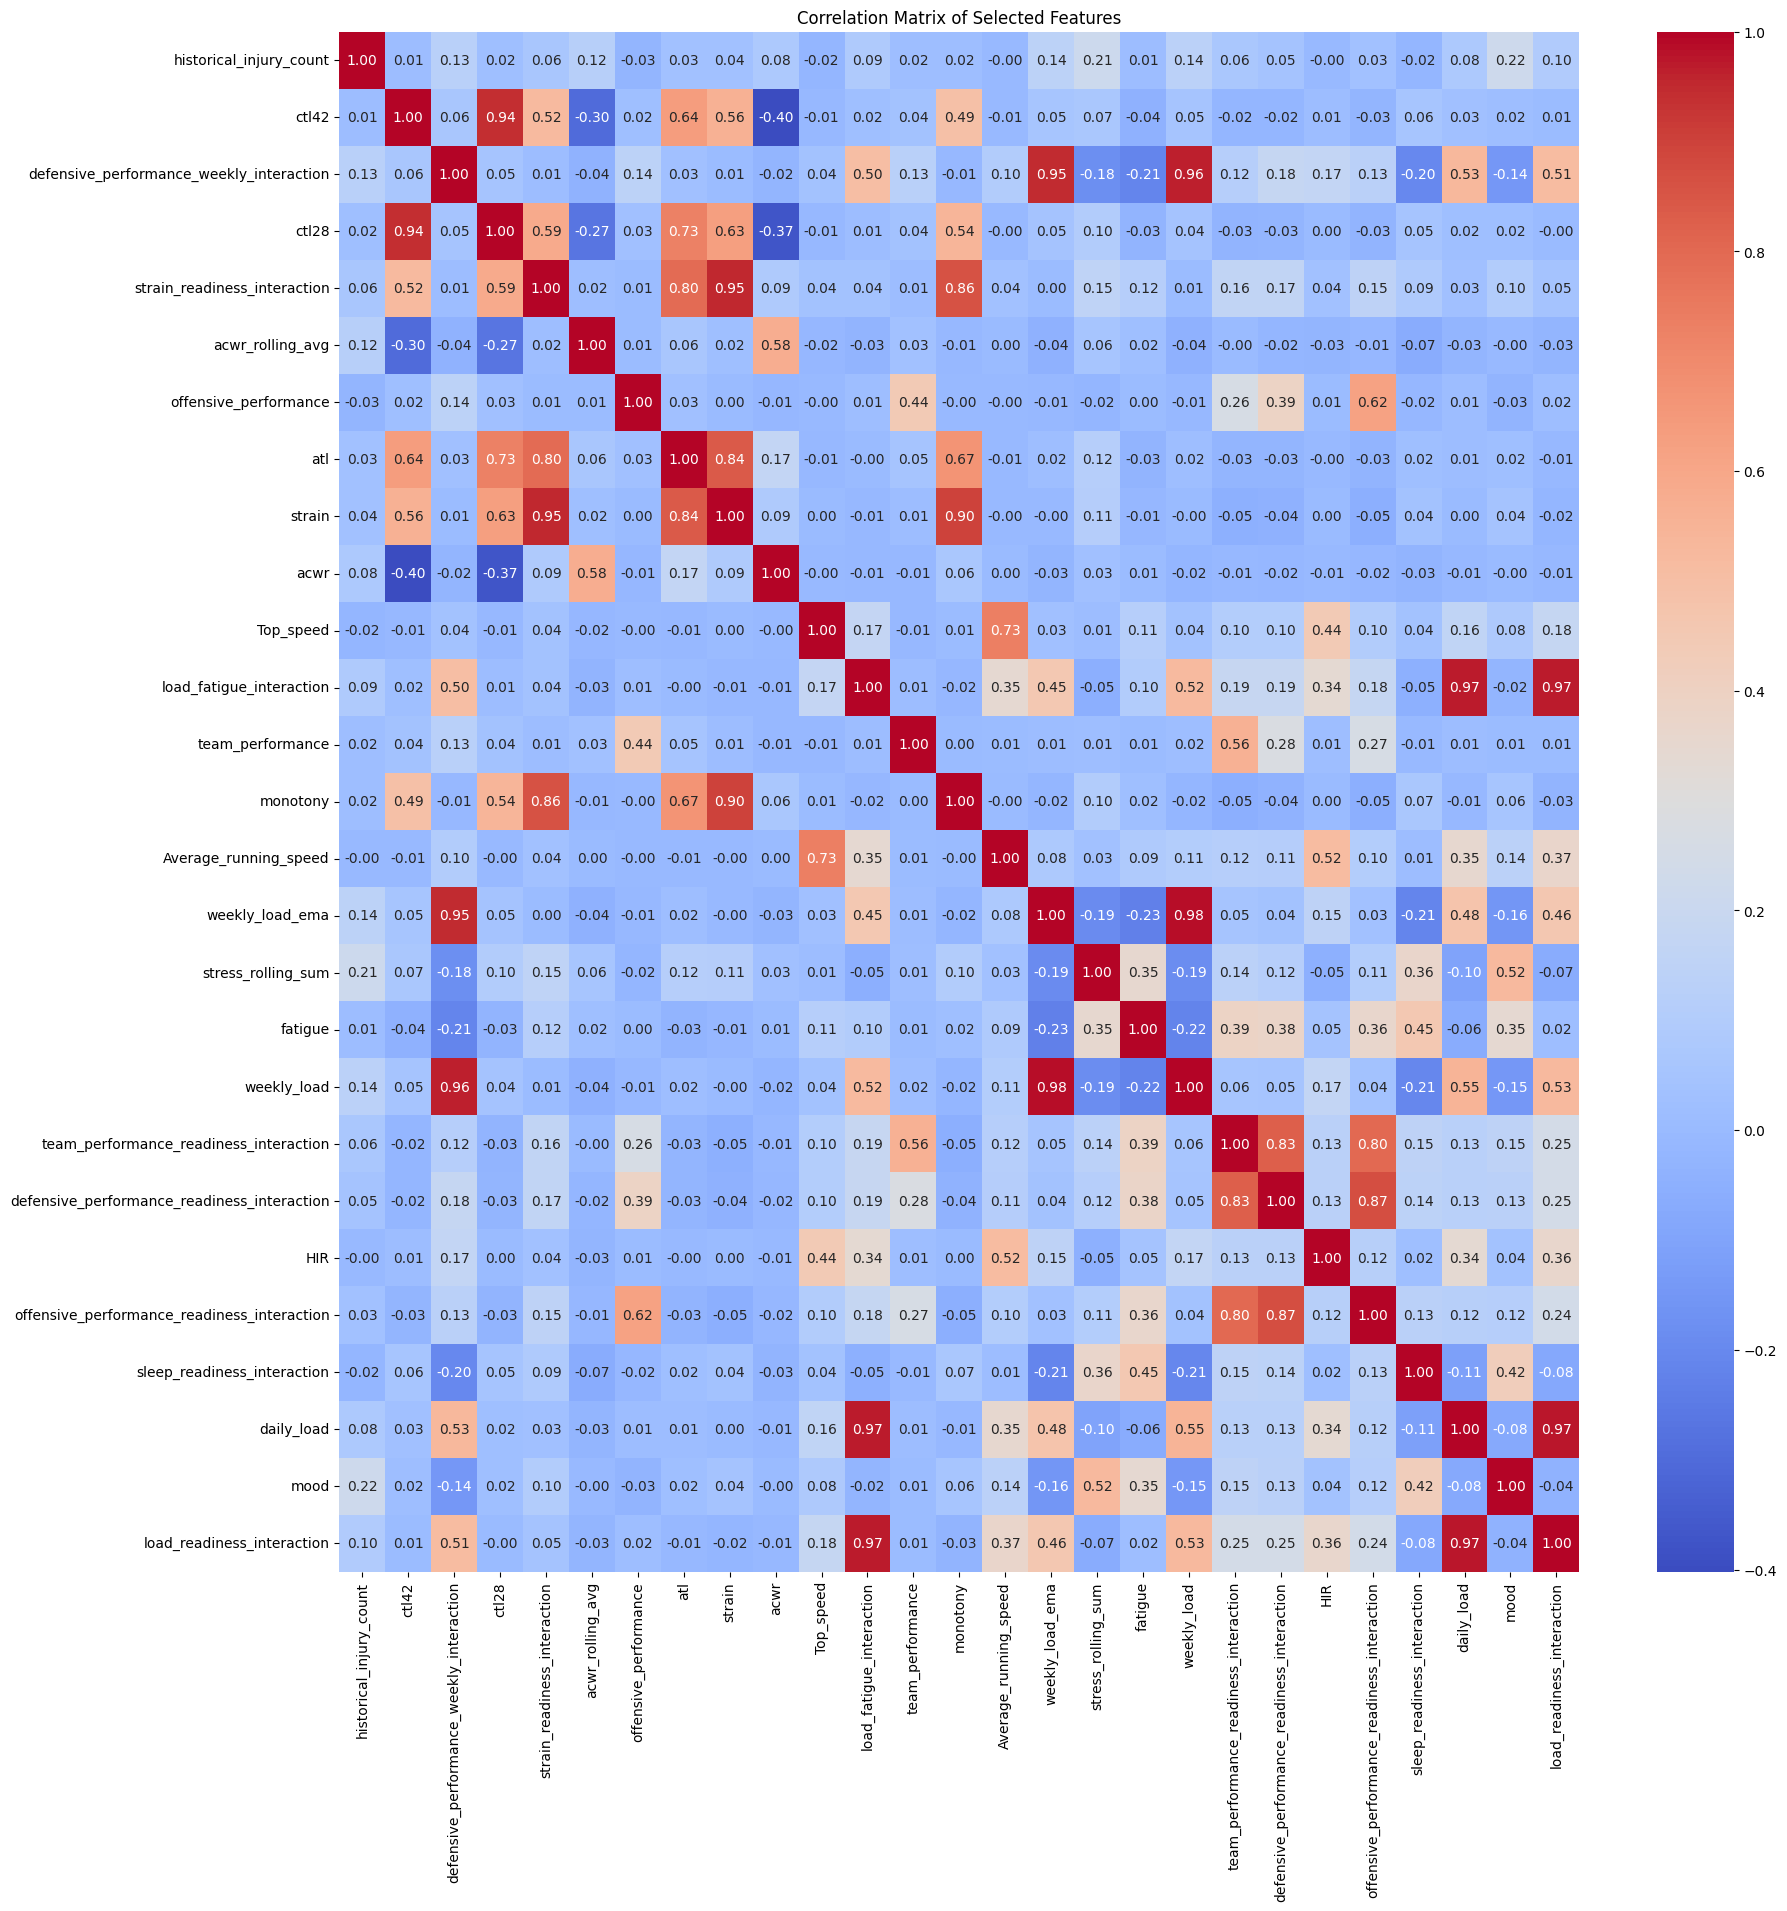

In [ ]:
# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Matrix of Selected Features")
plt.show()

Here are some feature pairs with relatively high correlation coefficients:

- Sleep Quality and Sleep Readiness Interaction: There is a strong positive correlation of 0.917 between sleep quality and sleep readiness interaction, indicating that higher sleep readiness tends to coincide with better sleep quality.

- Stress and Mood: Stress and mood have a strong positive correlation of 0.616, suggesting that higher levels of stress are associated with poorer mood.

- Stress and Stress Readiness Interaction: Stress and stress readiness interaction have a very strong positive correlation of 0.742, indicating that higher stress readiness is associated with higher stress levels.

- Weekly Load and ACWR (Acute:Chronic Workload Ratio) Rolling Average: There is a positive correlation of 0.881 between weekly load and ACWR rolling average, suggesting that as weekly load increases, the ACWR tends to increase as well.

- Monotony and ATL (Acute Training Load): Monotony and ATL have a moderate positive correlation of 0.648, indicating that higher levels of monotony tend to coincide with higher acute training loads.

- Strain and Strain Readiness Interaction: Strain and strain readiness interaction have a very strong positive correlation of 0.938, indicating that higher strain readiness tends to coincide with higher levels of strain.

- Load Readiness Interaction and Daily Load: Load readiness interaction and daily load have a very strong positive correlation of 0.963, indicating that higher load readiness tends to coincide with higher daily loads.

In [ ]:
import pandas as pd
import numpy as np

# Set the correlation threshold above which features will be considered redundant
correlation_threshold = 0.9

# Create a boolean mask to identify highly correlated features
correlation_matrix = df.corr().abs()
upper_triangular_mask = np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
highly_correlated_mask = correlation_matrix > correlation_threshold
redundant_features_mask = upper_triangular_mask & highly_correlated_mask

# Identify redundant feature pairs
redundant_pairs = [(correlation_matrix.columns[i], correlation_matrix.columns[j])
                   for i, j in zip(*np.where(redundant_features_mask))]

# Print redundant feature pairs
print("Redundant Feature Pairs:")
for feature1, feature2 in redundant_pairs:
    print(f"{feature1} - {feature2}")

# Drop redundant features from the DataFrame
df = df.drop(columns=[feature2 for feature1, feature2 in redundant_pairs])

# Print the reduced DataFrame
print("\nDataFrame after removing redundant features:")
df.head()

Redundant Feature Pairs:
daily_load - load_readiness_interaction
daily_load - load_fatigue_interaction
sleep_quality - sleep_readiness_interaction
weekly_load - defensive_performance_weekly_interaction
weekly_load - weekly_load_ema
ctl28 - ctl42
strain - strain_readiness_interaction
load_readiness_interaction - load_fatigue_interaction
defensive_performance_weekly_interaction - weekly_load_ema

DataFrame after removing redundant features:


,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,stress,injury_ts,weekly_load,...,offensive_performance,defensive_performance,illness,historical_injury_count,stress_readiness_interaction,team_performance_readiness_interaction,offensive_performance_readiness_interaction,defensive_performance_readiness_interaction,acwr_rolling_avg,stress_rolling_sum
1237,0.0,3.0,4.0,6.0,8.0,4.0,3.0,0.75,0.0,0.000000,...,6.94,6.14,0,0,24.0,38.16,41.64,36.84,0.320870,10.50
7976,0.0,3.0,3.0,6.0,7.0,3.0,3.0,0.50,0.0,0.000000,...,5.07,4.98,0,0,18.0,33.48,30.42,29.88,0.286085,7.00
8479,0.0,3.0,3.0,8.0,8.0,3.0,3.0,0.50,0.0,0.000000,...,7.06,7.09,0,0,24.0,56.56,56.48,56.72,0.325813,7.00
7450,0.0,3.0,3.0,8.0,8.0,3.0,3.0,0.50,0.0,0.000000,...,5.61,6.40,0,0,24.0,43.36,44.88,51.20,0.272225,7.00
3827,200.0,4.0,3.0,8.0,8.0,4.0,3.0,0.50,0.0,0.488536,...,6.74,6.65,0,0,24.0,56.40,53.92,53.20,0.260681,7.25


In [ ]:
df.isna().sum()

daily_load                                     0
fatigue                                        0
mood                                           0
readiness                                      0
sleep_duration                                 0
sleep_quality                                  0
soreness                                       0
stress                                         0
injury_ts                                      0
weekly_load                                    0
Team                                           0
Total_distance                                 0
Average_running_speed                          0
Top_speed                                      0
HIR                                            0
injury                                         0
acwr                                           0
atl                                            0
ctl28                                          0
monotony                                       0
strain              

In [ ]:
df.shape

(8582, 32)

In [ ]:
# df['injury'] = synthetic_data__['injury']
df['injury'][0]

0

In [ ]:
# # Shuffle the DataFrame
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1).reset_index(drop=True)
# df = df.sample(frac=1).reset_index(drop=True)

def move_column_to_end(df, column_name):
    columns = [col for col in df.columns if col != column_name]
    columns.append(column_name)
    return df[columns]

df = move_column_to_end(df, 'injury')

In [ ]:
df

,daily_load,fatigue,mood,readiness,sleep_duration,sleep_quality,soreness,stress,injury_ts,weekly_load,...,defensive_performance,illness,historical_injury_count,stress_readiness_interaction,team_performance_readiness_interaction,offensive_performance_readiness_interaction,defensive_performance_readiness_interaction,acwr_rolling_avg,stress_rolling_sum,injury
1237,0.0,3.0,4.0,6.0,8.0,4.0,3.0,0.75,0.0,0.000000,...,6.14,0,0,24.0,38.16,41.64,36.84,0.320870,10.50,0
7976,0.0,3.0,3.0,6.0,7.0,3.0,3.0,0.50,0.0,0.000000,...,4.98,0,0,18.0,33.48,30.42,29.88,0.286085,7.00,0
8479,0.0,3.0,3.0,8.0,8.0,3.0,3.0,0.50,0.0,0.000000,...,7.09,0,0,24.0,56.56,56.48,56.72,0.325813,7.00,0
7450,0.0,3.0,3.0,8.0,8.0,3.0,3.0,0.50,0.0,0.000000,...,6.40,0,0,24.0,43.36,44.88,51.20,0.272225,7.00,0
3827,200.0,4.0,3.0,8.0,8.0,4.0,3.0,0.50,0.0,0.488536,...,6.65,0,0,24.0,56.40,53.92,53.20,0.260681,7.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1770,320.0,2.0,3.0,5.0,7.0,4.0,2.0,0.50,0.0,0.440917,...,5.83,0,0,15.0,32.40,27.50,29.15,0.175310,7.00,0
6918,0.0,3.0,4.0,6.0,8.0,3.0,2.0,0.25,0.0,0.176367,...,5.73,0,0,12.0,40.74,27.60,34.38,0.246456,3.50,0
5879,0.0,3.0,3.0,7.0,8.0,4.0,3.0,0.50,0.0,0.000000,...,6.66,0,0,21.0,46.90,45.57,46.62,0.244719,7.00,0
7449,0.0,3.0,3.0,8.0,8.0,3.0,3.0,0.50,0.0,0.000000,...,6.98,0,0,24.0,57.36,60.96,55.84,0.288546,7.00,0


In [ ]:
df.isna().sum()

daily_load                                     0
fatigue                                        0
mood                                           0
readiness                                      0
sleep_duration                                 0
sleep_quality                                  0
soreness                                       0
stress                                         0
injury_ts                                      0
weekly_load                                    0
Team                                           0
Total_distance                                 0
Average_running_speed                          0
Top_speed                                      0
HIR                                            0
acwr                                           0
atl                                            0
ctl28                                          0
monotony                                       0
strain                                         0
team_performance    

In [ ]:
df['injury'].value_counts()

injury
0    8526
1      56
Name: count, dtype: int64

In [ ]:
df['Player_name'] = dff['player_names']

<ipython-input-59-2f0e479bc6a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Player_name'] = dff['player_names']


In [ ]:
type(df['Team'][0])

numpy.int64

In [ ]:
df['injury'].value_counts()

injury
0    8526
1      56
Name: count, dtype: int64

In [ ]:
df.to_csv("/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Final Dataset/injuryFinalV8582.csv", index=False)

In [ ]:
# Create a DataFrame for TeamA
teamA_df = df[df['Team'] == 0]
# Reset index for TeamA DataFrame
teamA_df.reset_index(drop=True, inplace=True)

# Create a DataFrame for TeamB
teamB_df = df[df['Team'] == 1]
# Reset index for TeamB DataFrame
teamB_df.reset_index(drop=True, inplace=True)

In [ ]:
teamA_df['injury'].value_counts()

injury
0    7180
1      56
Name: count, dtype: int64

In [ ]:
teamB_df['injury'].value_counts()

injury
0    1346
Name: count, dtype: int64

In [ ]:
teamA_df.to_csv("/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Final Dataset/injuryFinalVTeamA.csv", index=False)
teamB_df.to_csv("/content/drive/MyDrive/Soccer Player Injury Prediction/Datasets/Final Dataset/injuryFinalVTeamB.csv", index=False)